In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import transforms, datasets

from tqdm import tqdm
from net_class import cnn

In [2]:
X_train = np.load('data/X_train.npy', allow_pickle=True)
X_test = np.load('data/X_test.npy', allow_pickle=True)
y_train = np.load('data/y_train.npy', allow_pickle=True)
y_test = np.load('data/y_test.npy', allow_pickle=True)

In [3]:
X_train = torch.tensor(X_train).view(-1, 1, 28, 28).float()
X_test = torch.tensor(X_test).view(-1, 1, 28, 28).float()
y_train = torch.tensor(y_train).long()
y_test = torch.tensor(y_test).long()

In [4]:
# training
# simple replacement batch selection since its just mnist
# code structure inspired by george hotz:
# https://github.com/geohot/ai-notebooks/blob/master/mnist_from_scratch.ipynb

ITERATIONS = 3000
BS = 64
LR = 0.001

model = cnn().cuda()
optimizer = optim.Adam(model.parameters(), lr=LR)
loss_fn = nn.CrossEntropyLoss()

losses, accuracies = [], []

for i in tqdm(range(ITERATIONS)):
    samp = np.random.randint(0, X_train.shape[0], size=BS)
    X = X_train[samp].cuda()
    y = y_train[samp].cuda()

    output = model(X)

    model.zero_grad()
    loss = loss_fn(output, y)
    loss.backward()
    optimizer.step()

    accuracy = (torch.argmax(output, dim=1) == y).float().mean()
    losses.append(loss.item())
    accuracies.append(accuracy.item())

100%|██████████| 3000/3000 [00:10<00:00, 293.31it/s]


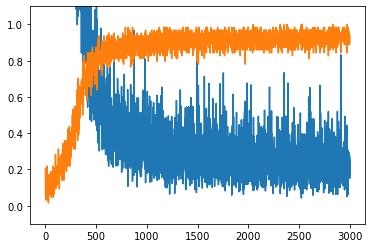

In [5]:
plt.ylim(-0.1, 1.1)
plt.plot(losses)
plt.plot(accuracies)

In [6]:
train_acc = np.array(accuracies[-10:]).mean()

val_output = torch.argmax(model(X_test.reshape(-1, 1, 28, 28).cuda()).float(), dim=1)
val_acc = (val_output == y_test.cuda()).float().mean()
print(f'Train accuracy: {train_acc}')
print(f'Test accuracy: {val_acc}')

Train accuracy: 0.9234375
Test accuracy: 0.9327999949455261


In [7]:
def save_model():
    torch.save(model.state_dict(), 'models/cnn_clf.pth')
    print("Model saved!")
save_model()

Model saved!
